# Exploratory Data Analysis for Loan Application Information

In this notebook, an exploratory data analysis **(EDA)** is performed on **Loan Application Information** data to get data insights which can then be **a help for data scientists.**

## Import Packages

In [1]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dbconnection
%matplotlib inline

## Import Data

In [2]:
user = dbconnection.username
password = dbconnection.password
host = dbconnection.host
port = dbconnection.port
sql_str = f'mysql+pymysql://{user}:{password}@{host}'
sqlEngine = create_engine(sql_str, pool_recycle=port)
dbConnection = sqlEngine.connect()
df = pd.read_sql("select * from paidyassignment.loan_applicant_info", dbConnection)

In [3]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## EDA

### Data Types

In [4]:
df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

|Datatype|Number of Columns|
|:-|:-|
|Numerical|11|
|Categorical|None|

#### Observation
- Data Table contains **all Numeric columns** and **no categorical columns**.

### Descripttion related to data

In [5]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366507,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


#### Observation
- It seems **age** column contains **minimum value 0**. Probably **data capture issue**. 
- There are three **Late Payment Columns**
     - NumberOfTime30-59DaysPastDueNotWorse
     - NumberOfTime60-89DaysPastDueNotWorse
     - NumberOfTimes90DaysLate
- All **Late Payemnt Columns** has **max value 98**, which seems **not logical** since it is not possible within timespan of 2 years.
     - NumberOfTime30-59DaysPastDueNotWorse = 98*30 = **2940 Days** 
     - NumberOfTime60-89DaysPastDueNotWorse = 98*60 = **5880 Days**
     - NumberOfTimes90DaysLate              = 98*90 = **8820 Days**
     - Which seems way off for 2 year(365*2 = **730 Days**)

### Null Values and Proportions

In [6]:
null_val_sums = df.isnull().sum()
pd.DataFrame({"Column":null_val_sums.index, "Number of Null Values":null_val_sums.values,"Proportion":null_val_sums.values/len(df)})

,Column,Number of Null Values,Proportion
0,SeriousDlqin2yrs,0,0.000000
1,RevolvingUtilizationOfUnsecuredLines,0,0.000000
2,age,0,0.000000
3,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
4,DebtRatio,0,0.000000
5,MonthlyIncome,29731,0.198207
6,NumberOfOpenCreditLinesAndLoans,0,0.000000
7,NumberOfTimes90DaysLate,0,0.000000
8,NumberRealEstateLoansOrLines,0,0.000000
9,NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


#### Observation
- **MonthlyIncome** and **NumberOfDependents** have **29731 (19.82%)** and **3924 (2.61%)** null values respectively

### Balance Of Data

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

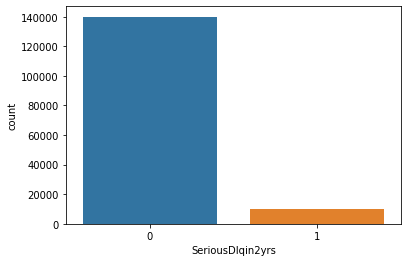

In [7]:
sns.countplot(x="SeriousDlqin2yrs", data=df)

In [8]:
print("Proportion of People Who Defaulted: {}".format(df["SeriousDlqin2yrs"].sum() / len(df)))

Proportion of People Who Defaulted: 0.06684


### RevolvingUtilizationOfUnsecuredLines

<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines'>

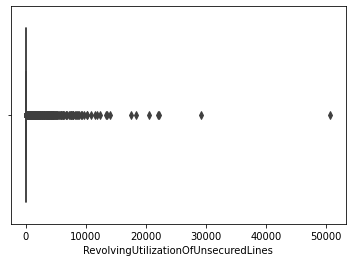

In [9]:
sns.boxplot(x='RevolvingUtilizationOfUnsecuredLines', data=df)

#### Observation
- Defined as ratio of the total amount of money owed to total credit limit **distribution** of values is **right-skewed**, consider removing **outliers**

### age

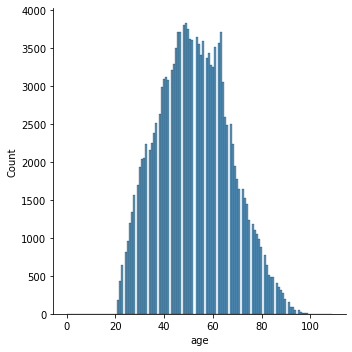

In [10]:
sns.displot(data=df, x="age")

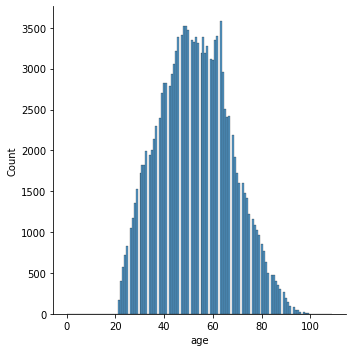

In [11]:
sns.displot(data=df.loc[df["SeriousDlqin2yrs"] == 0], x="age")

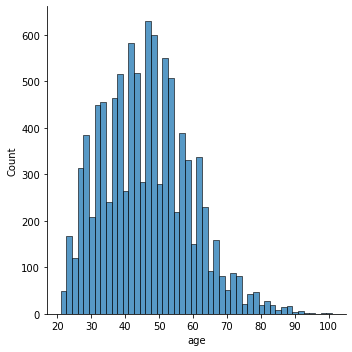

In [12]:
sns.displot(data=df.loc[df["SeriousDlqin2yrs"] == 1], x="age")

#### Observation
- There seems to be **more younger people defaulting** and the distribution seems fine on the whole

### NumberOfOpenCreditLinesAndLoans

In [13]:
df["NumberOfOpenCreditLinesAndLoans"].value_counts()

6     13614
7     13245
5     12931
8     12562
4     11609
9     11355
10     9624
3      9058
11     8321
12     7005
2      6666
13     5667
14     4546
1      4438
15     3645
16     3000
17     2370
0      1888
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
38       13
40       10
39        9
42        8
43        8
45        8
37        7
48        6
49        4
41        4
54        4
46        3
52        3
57        2
56        2
44        2
51        2
50        2
47        2
53        1
58        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

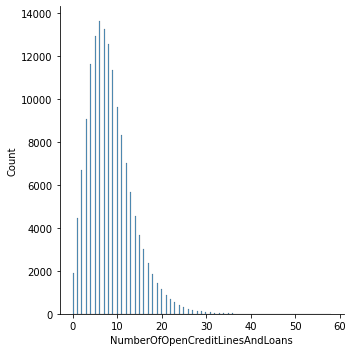

In [14]:
sns.displot(data=df, x = "NumberOfOpenCreditLinesAndLoans")

### NumberRealEstateLoansOrLines

In [15]:
df["NumberRealEstateLoansOrLines"].value_counts()

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
15        7
14        7
16        4
17        4
25        3
18        2
19        2
20        2
23        2
21        1
26        1
29        1
32        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

<AxesSubplot:xlabel='NumberRealEstateLoansOrLines', ylabel='count'>

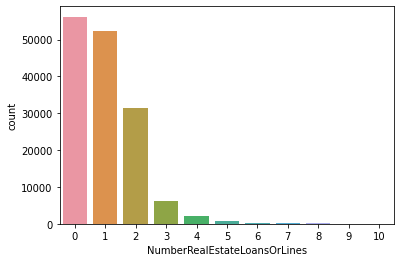

In [16]:
sns.countplot(x="NumberRealEstateLoansOrLines", data=df.loc[df["NumberRealEstateLoansOrLines"] <= 10])

### NumberOfDependents

In [17]:
df["NumberOfDependents"].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

<AxesSubplot:xlabel='NumberOfDependents', ylabel='count'>

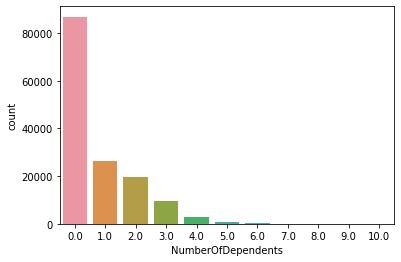

In [18]:
sns.countplot(x="NumberOfDependents", data=df.loc[df["NumberOfDependents"] <= 10])

## Final Thoughts

- Highly imbalanced data
- Datatypes are matching with intended schema.
- Impute MonthlyIncome with its median, or with a normally distributed variable with MonthlyIncome's mean and standard deviation
- Impute NumberOfDependents with its mode
- Impute age=0 outlier by the median of the column

In [19]:
dbConnection.close()